In [1]:
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy.stats import ttest_ind

In [2]:
#reading in the CSE 11 file which has the final exam percentage and the overall grade percentage:
grade_reporting = pd.read_csv("../Data/CSE 11 Fall 2019 DeID/DeID GradeReporting_CSE11_F19.csv")

In [3]:
#reading in the CSE 11 file which has the pre_survey data:
pre_survey = pd.read_csv("../Data/CSE 11 Fall 2019 DeID/DeID Pre-Survey CSE 11 Fall 2019.csv")

In [4]:
#renaming the "Did you enter UCSD as a transfer student...." column:
pre_survey = pre_survey.rename(columns =({"Did.you.enter.UCSD.as.a.transfer.student.from.another..2.year.or.4.year..college.or.university.":"transfer_student_status"}))

In [5]:
#making sure the column got renamed:
pre_survey.head(1)

,Timestamp,transfer_student_status,If.your.current.declared.major.is.different.from.your.desired.major..i.e..you.hope.to.switch.majors...what.major.do.you.hope.to.switch.to...Leave.blank.if.this.does.not.apply.to.you..,What.is.the.main.reason.you.are.taking.this.course.,On.a.scale.of.1.to.5..how.much.experience.did.you.have.with.programming.computer.science.before.you.took.your.FIRST.course.at.UC.San.Diego.,Please.select.all.of.the.CS.programming.experiences.you.had.before.taking.your.FIRST.CS.course.at.UCSD.,Please.rate.your.current.level.of.experience.with.technology.in.general,On.a.scale.of.1.to.5..how.confident.are.you.about.your.ability.to.do.well.in.this.course.,What.is.the.MINIMUM.grade.you.think.you.would.be.satisfied.with.in.this.course...If.you.re.taking.this.course.pass.no.pass..note.that.C..is.the.threshold.for.passing...,What.is.your.gender.,What.is.your.ethnicity.,What.is.your.race...Select.all.that.apply.,What.is.your.fluency.with.English.,DeID
0,9/27/2019 16:28,No,NaN,To fulfill a major requirement (for your curre...,3.0,"Took AP CS A, Took AP Calculus, Took AP Statis...","A lot of experience: e.g., worked with multipl...",5.0,A,Male,Not Hispanic or Latino/a,East or Southeast Asian,I learned English as a child in a bilingual or...,00T90APX


In [6]:
#filtering the pre_survey table only with transfer status and DeID:
transferStatusWithDeID = pre_survey[["transfer_student_status","DeID"]]

In [7]:
transferStatusWithDeID = transferStatusWithDeID.dropna()

In [8]:
#filtering only the students that are TRANSFER students and printing that table:
onlyTransferStudents = transferStatusWithDeID[transferStatusWithDeID.transfer_student_status == "Yes"]
#print(onlyTransferStudents)

In [9]:
#filtering only students that are REGULAR students and printing that table:
onlyRegularStudents = transferStatusWithDeID[transferStatusWithDeID.transfer_student_status == "No"]
print(onlyRegularStudents)

    transfer_student_status      DeID
0                        No  00T90APX
2                        No  025LQFB2
3                        No  039HIM2X
4                        No  04T56IGQ
5                        No  06HH1YB1
..                      ...       ...
474                      No  ZQRWVMSS
475                      No  ZT9CDKWM
477                      No  ZWOIJJTE
478                      No  ZZ5H6MQD
479                      No  ZZCK945I

[419 rows x 2 columns]


In [10]:
grade_reporting.head()

,Overall.weighted.course.percentage,Final.exam.percentage,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PA8,...,Lecture.21..1.,Lecture.22..1.,Lecture.23..1.,Lecture.24..1.,Lecture.25..1.,Lecture.26..1.,Lecture.27..1.,Lecture.28..1.,Lecture.29..1.,DeID
0,0.959167,0.883333,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,...,1,1,1,1,1,1,1,1,1,00T90APX
1,0.067128,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0,0,1,0,0,0,0,0,0,01EAM9F6
2,0.943173,0.875000,1.0,1.0,1.0,0.866667,1.0,1.0,1.0,1.00,...,1,1,1,1,1,1,0,1,1,025LQFB2
3,0.975942,0.958333,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,0.99,...,1,1,1,0,1,1,1,1,1,039HIM2X
4,0.991250,0.975000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,...,1,1,1,1,1,1,1,1,1,04T56IGQ


In [11]:
#extracting the table which contains only the final exam scores, overall course weightage and DeiD
scores_and_DeID = grade_reporting[["Overall.weighted.course.percentage","Final.exam.percentage","DeID"]]
scores_and_DeID.head()

,Overall.weighted.course.percentage,Final.exam.percentage,DeID
0,0.959167,0.883333,00T90APX
1,0.067128,0.000000,01EAM9F6
2,0.943173,0.875000,025LQFB2
3,0.975942,0.958333,039HIM2X
4,0.991250,0.975000,04T56IGQ


In [12]:
#merging the transfer status, deID and two columns with score percentages:
scores_and_status = pd.merge(transferStatusWithDeID,scores_and_DeID)
print(scores_and_status)

    transfer_student_status      DeID  Overall.weighted.course.percentage  \
0                        No  00T90APX                            0.959167   
1                       Yes  01EAM9F6                            0.067128   
2                        No  025LQFB2                            0.943173   
3                        No  039HIM2X                            0.975942   
4                        No  04T56IGQ                            0.991250   
..                      ...       ...                                 ...   
465                      No  ZT9CDKWM                            0.973750   
466                     Yes  ZTFNAYUD                            0.011846   
467                      No  ZWOIJJTE                            0.855321   
468                      No  ZZ5H6MQD                            0.859263   
469                      No  ZZCK945I                            0.976667   

     Final.exam.percentage  
0                 0.883333  
1                

In [13]:
scores_and_status.info() #making sure all objects are non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 469
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   transfer_student_status             470 non-null    object 
 1   DeID                                470 non-null    object 
 2   Overall.weighted.course.percentage  470 non-null    float64
 3   Final.exam.percentage               470 non-null    float64
dtypes: float64(2), object(2)
memory usage: 18.4+ KB


In [14]:
#getting the average final exam scores and overall weightage for just transfers:
transfers_info = scores_and_status[scores_and_status.transfer_student_status == "Yes"]
print(transfers_info)

    transfer_student_status      DeID  Overall.weighted.course.percentage  \
1                       Yes  01EAM9F6                            0.067128   
21                      Yes  1DSTM3NG                            0.140051   
24                      Yes  1ORHZ9JA                            0.923205   
48                      Yes  3D3BRZB7                            0.943862   
51                      Yes  3LYT1R1X                            0.935686   
61                      Yes  51MR6YN1                            0.902859   
75                      Yes  62IJ27VA                            0.988333   
81                      Yes  6KO63VOW                            0.217385   
93                      Yes  7GKTBBQY                            0.075846   
101                     Yes  7S0FMBQB                            0.961154   
110                     Yes  85YCIZ2K                            0.967891   
113                     Yes  8FD8NOQY                            0.537065   

In [15]:
transfers_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 1 to 466
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   transfer_student_status             57 non-null     object 
 1   DeID                                57 non-null     object 
 2   Overall.weighted.course.percentage  57 non-null     float64
 3   Final.exam.percentage               57 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.2+ KB


In [16]:
#getting all relevant scores for natives:
natives_info = scores_and_status[scores_and_status.transfer_student_status == "No"]
print(natives_info)

    transfer_student_status      DeID  Overall.weighted.course.percentage  \
0                        No  00T90APX                            0.959167   
2                        No  025LQFB2                            0.943173   
3                        No  039HIM2X                            0.975942   
4                        No  04T56IGQ                            0.991250   
5                        No  06HH1YB1                            0.911442   
..                      ...       ...                                 ...   
464                      No  ZQRWVMSS                            0.924167   
465                      No  ZT9CDKWM                            0.973750   
467                      No  ZWOIJJTE                            0.855321   
468                      No  ZZ5H6MQD                            0.859263   
469                      No  ZZCK945I                            0.976667   

     Final.exam.percentage  
0                 0.883333  
2                

In [17]:
#calculating average final exam score for transfers:
transfers_final_avg = (transfers_info["Final.exam.percentage"].mean()) * 100
print(transfers_final_avg)

63.1578947385965


In [18]:
#calculating average final exam score for natives:
natives_final_avg = (natives_info["Final.exam.percentage"].mean()) * 100
print(natives_final_avg)

78.21630347118642


In [19]:
#calculating average overall weighted percentage for transfers:
transfers_overall_avg = (transfers_info["Overall.weighted.course.percentage"].mean()) * 100
print(transfers_overall_avg)

72.05118469999998


In [20]:
#calculating average overall weighted percentage for natives:
natives_overall_avg = (natives_info["Overall.weighted.course.percentage"].mean()) * 100
print(natives_overall_avg)

85.73772595205811


In [21]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [22]:
#finals percentage data (blue bars):
n = 1 #since this is our first dataset
t = 3 #number of datasets
d = 2 #number of sets of bars
w = 0.8 #specifying the width
x_values1 = [t*element + w*n for element in range(d)]

In [23]:
#overall percentage data (orange bars):
n = 2 #This is our second dataset
t = 3 #number of datasets
d = 2 #number of sets of bars
w = 0.8 #width of bars
x_values2 = [t*element + w*n for element in range(d)]

In [24]:
#attendance percentage data:
n = 3
t = 3
d = 2
w = 0.8
x_values3 = [t*element + w*n for element in range(d)]

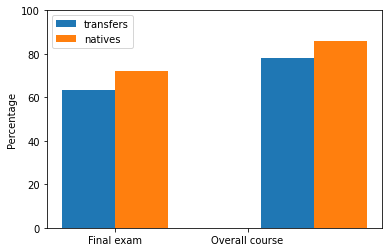

In [25]:
final_exam_list = [transfers_final_avg,natives_final_avg]
overall_course_list = [transfers_overall_avg,natives_overall_avg]
plt.bar(x_values1,final_exam_list) #plotting the final exam percentages
plt.bar(x_values2,overall_course_list) #plotting the overall course percentages

ax = plt.subplot()
ax.set_xticks([1.2,3.2]) #placement of the ticks
ax.set_xticklabels(["Final exam", "Overall course"])

plt.legend(['transfers','natives'])
plt.ylim(0,100)
plt.ylabel("Percentage")

plt.show()

In [26]:
#calculating the attendance averages for both groups:
grade_reporting

,Overall.weighted.course.percentage,Final.exam.percentage,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PA8,...,Lecture.21..1.,Lecture.22..1.,Lecture.23..1.,Lecture.24..1.,Lecture.25..1.,Lecture.26..1.,Lecture.27..1.,Lecture.28..1.,Lecture.29..1.,DeID
0,0.959167,0.883333,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.00,...,1,1,1,1,1,1,1,1,1,00T90APX
1,0.067128,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,...,0,0,1,0,0,0,0,0,0,01EAM9F6
2,0.943173,0.875000,1.0,1.000000,1.000000,0.866667,1.000000,1.0,1.0,1.00,...,1,1,1,1,1,1,0,1,1,025LQFB2
3,0.975942,0.958333,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.99,...,1,1,1,0,1,1,1,1,1,039HIM2X
4,0.991250,0.975000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.00,...,1,1,1,1,1,1,1,1,1,04T56IGQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,0.973750,0.925000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.00,...,1,1,1,1,1,1,1,1,1,ZT9CDKWM
493,0.011846,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,...,0,0,1,0,0,0,0,0,0,ZTFNAYUD
494,0.855321,0.558333,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.00,...,1,1,1,1,1,1,1,0,1,ZWOIJJTE
495,0.859263,0.825000,1.0,0.866667,0.933333,1.000000,0.666667,1.0,1.0,0.99,...,0,1,1,1,1,0,0,1,1,ZZ5H6MQD


In [27]:
#filtering out the DeID columns with all attendance scores:
#DeID_attendance = grade_reporting[['L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','AA','AB','AC','AD','AE','AF','AG','AH','AI','AJ','AK','AL','AM','AN']]

#finding out the column indices for the columns we want:
print(grade_reporting.columns.get_loc("Lecture.2..1."))
print(grade_reporting.columns.get_loc("Lecture.29..1."))
print(grade_reporting.columns.get_loc("DeID"))

11
38
39


In [28]:
#extracting the necessary columns (all attendance + DeID):
DeID_and_attendance = grade_reporting.iloc[:,11:40]
DeID_and_attendance #table with all the attendance columns + DeID

,Lecture.2..1.,Lecture.3..1.,Lecture.4..1.,Lecture.5..1.,Lecture.6..1.,Lecture.7..1.,Lecture.8..1.,Lecture.9..1.,Lecture.10..1.,Lecture.11..1.,...,Lecture.21..1.,Lecture.22..1.,Lecture.23..1.,Lecture.24..1.,Lecture.25..1.,Lecture.26..1.,Lecture.27..1.,Lecture.28..1.,Lecture.29..1.,DeID
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,00T90APX
1,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,01EAM9F6
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,025LQFB2
3,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,1,1,1,1,1,039HIM2X
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,04T56IGQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,ZT9CDKWM
493,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,ZTFNAYUD
494,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,ZWOIJJTE
495,1,1,1,0,1,1,0,1,1,0,...,0,1,1,1,1,0,0,1,1,ZZ5H6MQD


In [29]:
#merging the DeID_and_attendance table with the transferStatusWithDeID table:
attendance_and_status = pd.merge(transferStatusWithDeID,DeID_and_attendance)
attendance_and_status

,transfer_student_status,DeID,Lecture.2..1.,Lecture.3..1.,Lecture.4..1.,Lecture.5..1.,Lecture.6..1.,Lecture.7..1.,Lecture.8..1.,Lecture.9..1.,...,Lecture.20..1.,Lecture.21..1.,Lecture.22..1.,Lecture.23..1.,Lecture.24..1.,Lecture.25..1.,Lecture.26..1.,Lecture.27..1.,Lecture.28..1.,Lecture.29..1.
0,No,00T90APX,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Yes,01EAM9F6,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,No,025LQFB2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
3,No,039HIM2X,1,1,1,1,1,1,1,0,...,1,1,1,1,0,1,1,1,1,1
4,No,04T56IGQ,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,No,ZT9CDKWM,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
466,Yes,ZTFNAYUD,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
467,No,ZWOIJJTE,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
468,No,ZZ5H6MQD,1,1,1,0,1,1,0,1,...,1,0,1,1,1,1,0,0,1,1


In [30]:
#filtering out the table further for TRANSFER students:
transfers_attendance = attendance_and_status[attendance_and_status.transfer_student_status == "Yes"]
transfers_attendance = transfers_attendance.reset_index(drop=True)
transfers_attendance

,transfer_student_status,DeID,Lecture.2..1.,Lecture.3..1.,Lecture.4..1.,Lecture.5..1.,Lecture.6..1.,Lecture.7..1.,Lecture.8..1.,Lecture.9..1.,...,Lecture.20..1.,Lecture.21..1.,Lecture.22..1.,Lecture.23..1.,Lecture.24..1.,Lecture.25..1.,Lecture.26..1.,Lecture.27..1.,Lecture.28..1.,Lecture.29..1.
0,Yes,01EAM9F6,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Yes,1DSTM3NG,1,1,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Yes,1ORHZ9JA,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,Yes,3D3BRZB7,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0
4,Yes,3LYT1R1X,1,1,1,1,1,0,1,1,...,1,1,1,1,1,0,1,1,1,1
5,Yes,51MR6YN1,1,1,1,1,1,1,0,1,...,0,0,1,1,0,1,0,1,1,0
6,Yes,62IJ27VA,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,Yes,6KO63VOW,1,1,0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
8,Yes,7GKTBBQY,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,Yes,7S0FMBQB,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [31]:
#filtering out the table further for NATIVE students:
natives_attendance = attendance_and_status[attendance_and_status.transfer_student_status == "No"]
natives_attendance = natives_attendance.reset_index(drop=True)
natives_attendance

,transfer_student_status,DeID,Lecture.2..1.,Lecture.3..1.,Lecture.4..1.,Lecture.5..1.,Lecture.6..1.,Lecture.7..1.,Lecture.8..1.,Lecture.9..1.,...,Lecture.20..1.,Lecture.21..1.,Lecture.22..1.,Lecture.23..1.,Lecture.24..1.,Lecture.25..1.,Lecture.26..1.,Lecture.27..1.,Lecture.28..1.,Lecture.29..1.
0,No,00T90APX,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,No,025LQFB2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
2,No,039HIM2X,1,1,1,1,1,1,1,0,...,1,1,1,1,0,1,1,1,1,1
3,No,04T56IGQ,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,No,06HH1YB1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,No,ZQRWVMSS,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
409,No,ZT9CDKWM,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
410,No,ZWOIJJTE,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
411,No,ZZ5H6MQD,1,1,1,0,1,1,0,1,...,1,0,1,1,1,1,0,0,1,1


In [32]:
#calculating average attendance for each transfer:
#transfers_attendance['average attendance'] = transfers_attendance[:, 2:30].sum(axis=1)
print(transfers_attendance.columns.get_loc("Lecture.2..1."))
print(transfers_attendance.columns.get_loc("Lecture.29..1."))

2
29


In [33]:
total_attendance = transfers_attendance.sum(axis = 1)
total_attendance

0      3
1      7
2     27
3     26
4     26
5     19
6     28
7      8
8      3
9     28
10    24
11    17
12    28
13     5
14    23
15     5
16    26
17    28
18    13
19    28
20    23
21    27
22     5
23    26
24    27
25    28
26    26
27    26
28     2
29    24
30    27
31     3
32    22
33    27
34    25
35     5
36    26
37    20
38    25
39    28
40    27
41    28
42    19
43     6
44    17
45     2
46    27
47    15
48    25
49    26
50    27
51    27
52    20
53    27
54     2
55    27
56     2
dtype: int64

In [34]:
#appending the total to the existing transfer attendance table:
transfers_attendance['total attendance'] = total_attendance.to_list()
transfers_attendance

,transfer_student_status,DeID,Lecture.2..1.,Lecture.3..1.,Lecture.4..1.,Lecture.5..1.,Lecture.6..1.,Lecture.7..1.,Lecture.8..1.,Lecture.9..1.,...,Lecture.21..1.,Lecture.22..1.,Lecture.23..1.,Lecture.24..1.,Lecture.25..1.,Lecture.26..1.,Lecture.27..1.,Lecture.28..1.,Lecture.29..1.,total attendance
0,Yes,01EAM9F6,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
1,Yes,1DSTM3NG,1,1,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,7
2,Yes,1ORHZ9JA,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,27
3,Yes,3D3BRZB7,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,0,26
4,Yes,3LYT1R1X,1,1,1,1,1,0,1,1,...,1,1,1,1,0,1,1,1,1,26
5,Yes,51MR6YN1,1,1,1,1,1,1,0,1,...,0,1,1,0,1,0,1,1,0,19
6,Yes,62IJ27VA,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,28
7,Yes,6KO63VOW,1,1,0,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,8
8,Yes,7GKTBBQY,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
9,Yes,7S0FMBQB,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,28


In [35]:
transfers_attendance['average_attendance'] =  transfers_attendance['total attendance']/26
transfers_attendance.loc[transfers_attendance.average_attendance > 1, "average_attendance"] = 1
transfers_attendance['average_attendance'] = transfers_attendance['average_attendance']*100
transfers_attendance

,transfer_student_status,DeID,Lecture.2..1.,Lecture.3..1.,Lecture.4..1.,Lecture.5..1.,Lecture.6..1.,Lecture.7..1.,Lecture.8..1.,Lecture.9..1.,...,Lecture.22..1.,Lecture.23..1.,Lecture.24..1.,Lecture.25..1.,Lecture.26..1.,Lecture.27..1.,Lecture.28..1.,Lecture.29..1.,total attendance,average_attendance
0,Yes,01EAM9F6,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,3,11.538462
1,Yes,1DSTM3NG,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,7,26.923077
2,Yes,1ORHZ9JA,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,27,100.000000
3,Yes,3D3BRZB7,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,0,26,100.000000
4,Yes,3LYT1R1X,1,1,1,1,1,0,1,1,...,1,1,1,0,1,1,1,1,26,100.000000
5,Yes,51MR6YN1,1,1,1,1,1,1,0,1,...,1,1,0,1,0,1,1,0,19,73.076923
6,Yes,62IJ27VA,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,28,100.000000
7,Yes,6KO63VOW,1,1,0,1,1,1,1,0,...,0,1,0,0,0,0,0,0,8,30.769231
8,Yes,7GKTBBQY,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,3,11.538462
9,Yes,7S0FMBQB,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,28,100.000000


In [36]:
#adding up the average value of all transfer students attendance: 
AverageTransfersAttendance = (transfers_attendance['average_attendance'].sum())/57
print(AverageTransfersAttendance)

73.61673414304992


In [37]:
#repating the same process for native students:

#calculating average attendance for each native students:
#transfers_attendance['average attendance'] = transfers_attendance[:, 2:30].sum(axis=1)
print(natives_attendance.columns.get_loc("Lecture.2..1."))
print(natives_attendance.columns.get_loc("Lecture.29..1."))

2
29


In [38]:
#summing up total attendance for native students:
total_attendance = natives_attendance.sum(axis = 1)
total_attendance

0      28
1      27
2      25
3      27
4      26
       ..
408    26
409    28
410    27
411    17
412    28
Length: 413, dtype: int64

In [39]:
#appending the total to the existing native attendance table:
natives_attendance['total attendance'] = total_attendance.to_list()
natives_attendance

,transfer_student_status,DeID,Lecture.2..1.,Lecture.3..1.,Lecture.4..1.,Lecture.5..1.,Lecture.6..1.,Lecture.7..1.,Lecture.8..1.,Lecture.9..1.,...,Lecture.21..1.,Lecture.22..1.,Lecture.23..1.,Lecture.24..1.,Lecture.25..1.,Lecture.26..1.,Lecture.27..1.,Lecture.28..1.,Lecture.29..1.,total attendance
0,No,00T90APX,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,28
1,No,025LQFB2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,27
2,No,039HIM2X,1,1,1,1,1,1,1,0,...,1,1,1,0,1,1,1,1,1,25
3,No,04T56IGQ,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,27
4,No,06HH1YB1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,No,ZQRWVMSS,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,26
409,No,ZT9CDKWM,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,28
410,No,ZWOIJJTE,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,27
411,No,ZZ5H6MQD,1,1,1,0,1,1,0,1,...,0,1,1,1,1,0,0,1,1,17


In [40]:
#getting the average and removing any value above 1:
natives_attendance['average_attendance'] =  natives_attendance['total attendance']/26
natives_attendance.loc[natives_attendance.average_attendance > 1, "average_attendance"] = 1
natives_attendance['average_attendance'] = natives_attendance['average_attendance']*100
natives_attendance

,transfer_student_status,DeID,Lecture.2..1.,Lecture.3..1.,Lecture.4..1.,Lecture.5..1.,Lecture.6..1.,Lecture.7..1.,Lecture.8..1.,Lecture.9..1.,...,Lecture.22..1.,Lecture.23..1.,Lecture.24..1.,Lecture.25..1.,Lecture.26..1.,Lecture.27..1.,Lecture.28..1.,Lecture.29..1.,total attendance,average_attendance
0,No,00T90APX,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,28,100.000000
1,No,025LQFB2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,27,100.000000
2,No,039HIM2X,1,1,1,1,1,1,1,0,...,1,1,0,1,1,1,1,1,25,96.153846
3,No,04T56IGQ,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,27,100.000000
4,No,06HH1YB1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,26,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,No,ZQRWVMSS,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,26,100.000000
409,No,ZT9CDKWM,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,28,100.000000
410,No,ZWOIJJTE,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,27,100.000000
411,No,ZZ5H6MQD,1,1,1,0,1,1,0,1,...,1,1,1,1,0,0,1,1,17,65.384615


In [41]:
#adding up the average value of all native students attendance: 
AverageNativesAttendance = (natives_attendance['average_attendance'].sum())/413
print(AverageNativesAttendance)

89.16930527100018


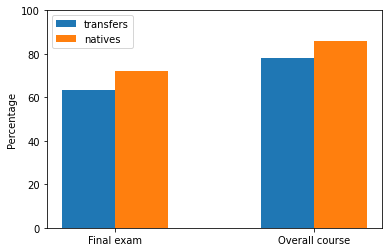

In [42]:
#all the y-axis data:
final_exam_list = [transfers_final_avg,natives_final_avg]
overall_course_list = [transfers_overall_avg,natives_overall_avg]
attendance_list = [AverageTransfersAttendance,AverageNativesAttendance]
#add the PA score data here later on

plt.bar(x_values1,final_exam_list) #plotting the final exam percentages
plt.bar(x_values2,overall_course_list) #plotting the overall course percentages
#plt.bar(x_values3, attendance_list)

ax = plt.subplot()
ax.set_xticks([1.2,4.2]) #placement of the ticks
ax.set_xticklabels(["Final exam", "Overall course"])

plt.legend(['transfers','natives'])
plt.ylim(0,100)
plt.ylabel("Percentage")

plt.show()

In [43]:
PAscores_transfers = [77.56304903664717]
PAscores_natives = [81.2984356881598]

/usr/local/lib/python3.7/site-packages/numpy/lib/stride_tricks.py:256: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


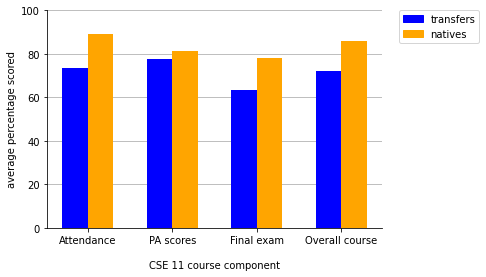

In [44]:
#recreating the plot with attendance data as well:

y1 = [AverageTransfersAttendance,PAscores_transfers,transfers_final_avg,transfers_overall_avg] #represents the first bar for transfer data
y2 = [AverageNativesAttendance,PAscores_natives,natives_final_avg,natives_overall_avg]

x = np.arange(len(y1)) #creates a range of values with a count of 3 so we can place things on the x-axis

bar_width = 0.3
plt.bar(x,y1,width = bar_width,color = 'blue', zorder = 2)
plt.bar(x + bar_width, y2, width = bar_width, color = 'orange', zorder = 2)

plt.xticks(x+bar_width*0.5,['Attendance','PA scores','Final exam','Overall course'])
plt.xlabel('CSE 11 course component', labelpad = 15)
plt.ylabel('average percentage scored')

#adding the legend:
blue_patch = mpatches.Patch(color = 'blue', label = 'transfers')
orange_patch = mpatches.Patch(color = 'orange', label = 'natives')
plt.legend(handles = [blue_patch,orange_patch],loc = (1.05,0.85))

plt.ylim(0,100)


plt.grid(axis = 'y')

plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

plt.show()

In [51]:
#doing the t-test for each component:
t_attendance_list = transfers_attendance['average_attendance'].tolist()
n_attendance_list = natives_attendance['average_attendance'].tolist()
t_test, pval = ttest_ind(t_attendance_list, n_attendance_list)
print(pval)

3.614210144541715e-05


In [54]:
#doing the t-test for the final exam by organizing the lists:
transfers_final = transfers_info["Final.exam.percentage"].tolist()
len(transfers_final)

57

In [55]:
natives_final = natives_info["Final.exam.percentage"].tolist()
len(natives_final)

413

In [56]:
#conducting the actual t-test and finding the p-value:
t_test, pval = ttest_ind(transfers_final, natives_final)
print(pval)

0.00030554583179057663


In [58]:
#conducting the t-test for the overall course percentage:
transfer_overall_list = transfers_info["Overall.weighted.course.percentage"].tolist()
#len(transfer_overall_list)
natives_overall_list = natives_info["Overall.weighted.course.percentage"].tolist()
len(natives_overall_list)

413

In [59]:
t_test, pval = ttest_ind(transfer_overall_list, natives_overall_list)
print(pval)

0.0003086759388476109
